# Problema
Em uma oficina, há uma média de ocorrência de 4 carros por semana serem provenientes de recall das montadoras.

Considerando que o recall de um carro é um evento aleatório que atende às condições da Distribuição de Poisson, calcule:
1. A probabilidade de nenhum carro de recall ser atendido em uma semana
2. A probabilidade de no máximo 2 carros atendidos serem de recall
3. A probabilidade de mais de 7 carros serem atendidos em função de recall


# Resolução
Pelo enunciado, podemos assumir que 4 será a Taxa de Ocorrência $(\lambda)$ que usaremos para verificar a probabilidade, utilizando a Distribuição de Poisson. Para o caso de não ter nenhum carro sendo chamado para recall em um ano, podemos utilizar a Função Massa de Probabilidade de Poisson, descrita abaixo:
$$
\mathbb{P}X(X=x)=\frac{e^{-\lambda }\lambda ^{x}}{x!} com =\left \{ 0,1,2,... \right \}
$$

Onde $\lambda=4$ e $x=0$

A biblioteca SciPy permite fazer os cálculos através do seu objeto `poisson`, e utilizaremos essa funcionalidade para o cálculo:

In [17]:
import math as m;
from scipy.stats import poisson

taxaDeOcorrencia=4
numeroDeRecalls = 0
probabilidadeDe0Recall =  (poisson.pmf(k=numeroDeRecalls, mu=taxaDeOcorrencia)*100).round(2)
print('Probabilidade de nenhum recall: ', probabilidadeDe0Recall, '%')


Probabilidade de nenhum recall:  1.83 %


Para a probabilidade de no máximo 2 carros serem atendidos, podemos utilizar a Função de Distribuição Acumulada (*Cumulative distribution function* em inglês), que acumula as probabilidades até um determinado ponto. Ela pode ser acessada através da função `cdf`:

In [29]:
numeroMaximoCarros2 = 2
probabilidadeMaximo2 = (poisson.cdf(k=numeroMaximoCarros2, mu=taxaDeOcorrencia)*100).round(2)
print('Probabilidade de 2 ou menos carros serem de recall: ', probabilidadeMaximo2,'%')

Probabilidade de 2 ou menos carros serem de recall:  23.81 %


Para uma probabilidade maior que um determinado valor, podemos utilizar a propriedade que todas as probabilidades somadas dão, como resultado, 1. Sendo assim, se conseguimos calcular a probabilidade até um determinado ponto usando a Função Distribuição Acumulada, a probabilidade do restante ocorrer será $$1-FDA$$:

In [28]:
numero7Carros = 7
probabilidadeMaisQue7 = 1 -poisson.cdf(k=numero7Carros, mu=taxaDeOcorrencia)
probabilidadeMaisQue7 = (probabilidadeMaisQue7 * 100).round(2)
print('Probabilidade de mais de 7 carros serem de recall: ', probabilidadeMaisQue7, '%')

Probabilidade de mais de 7 carros serem de recall:  5.11 %



É possível fazer um histograma levando em consideração o período de 1 ano (52 semanas), de forma que seja possível ver a distribuição desses atendimentos de forma gráfica:

Text(0.5, 1.0, 'Simulação de carros de recall atendidos(lambda = 4)')

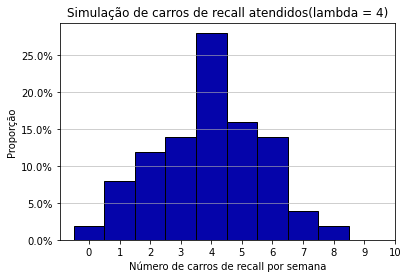

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

# Garante que a mesma semente será usada, permitindo que o gráfico fique com os mesmos dados sempre
np.random.seed(4)
#np.set_printoptions(precision=3)

#Gera a distribuição de Poisson, usando a taxa de ocorrência de 4 para o intervalor de 1 ano (52 semanas)
d = poisson.rvs(mu=taxaDeOcorrencia, size=52)
# Informa a quantidade de barras que serão mostradas. Está com -0.5 para que centralize no valor
xBins = np.arange(10) - 0.5
# An "interface" to matplotlib.axes.Axes.hist() method

n, bins, patches = plt.hist(x=d,edgecolor='black',bins=xBins, density=True, color='#0504aa',
                            alpha=1)
#Recupera a barra do valor 6 para pintar ela de vermelho
#patches[7].set_fc('r')
#Formata em percentual
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Número de carros de recall por semana')
plt.ylabel('Proporção')
#Informa quais números serão mostrados no eixo X
xTicks = [0,1,2,3,4,5,6,7,8,9,10]
plt.xticks(xTicks)
plt.title('Simulação de carros de recall atendidos(lambda = 4)')
#plt.text(23, 45, r'$\mu=4.5, b=365$')
# maxfreq = n.max()
# Set a clean upper y-axis limit.
# plt.ylim()